In [1]:
%pip install sec-api

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sec_api import ExtractorApi # https://pypi.org/project/sec-api/
# get API from sec-api.io
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")


# Apple 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972025000010/abnb-20241231.htm"

# get the standardized and cleaned text of section 1A "Risk Factors"
section1A = extractorApi.get_section(filing_url, "1A", "text")


print (section1A)

 Item 1A. Risk Factors 

Our business, operations, and financial results are subject to various risks and uncertainties, including those described below, that could materially adversely affect our business, results of operations, financial condition, and the trading price of our Class A common stock. The following material factors, among others, could cause our actual results to differ materially from historical results and those expressed in forward-looking statements made by us or on our behalf in filings with the SEC, press releases, communications with investors, and oral statements. 

Risks Related to Our Business and Operations 

Revenue and Growth Risks 

We may not be able to sustain our revenue growth rate or effectively manage growth or new opportunities. 

Our future revenue growth depends on the growth of supply and demand for listings on our platform and the development and adoption of new offerings and initiatives. Our business is also affected by general economic and bus

In [8]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


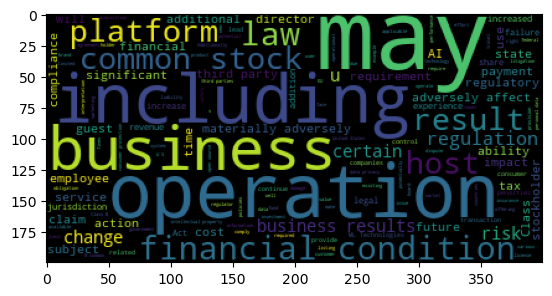

In [9]:
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

wc = WordCloud().generate(section1A)
plt.imshow(wc)

In [10]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [11]:
# import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# if you don't have vadar_lexicon data, you can run the following command in a terminal window:
#python -m nltk.downloader vader_lexicon
nltk.download('vader_lexicon')

# download nltk corpus (first time only)
nltk.download('all')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\agaebel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is a

True

In [12]:
#Create a Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()
#Analyze section_text
scores = analyzer.polarity_scores(section1A)

print(scores)
#the compound key is a normalized score that ranges from -1(most negative) to 1(most positive)

{'neg': 0.097, 'neu': 0.777, 'pos': 0.126, 'compound': 1.0}


In [13]:
#We can also check which score is the highest and use that to classify the text as positive, negative, or neutral.
if scores['compound'] >= 0.5:
    print("Positive")
elif scores['compound'] >-0.5:
    print("Neutral")
else:
    print("Negative")

Positive


In [14]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


# FinBERT

In [2]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972025000010/abnb-20241231.htm"


# Extract Section 1A "Risk Factors"
section_text = extractorApi.get_section(filing_url, "1A", "text")
print(section_text)

 Item 1A. Risk Factors 

Our business, operations, and financial results are subject to various risks and uncertainties, including those described below, that could materially adversely affect our business, results of operations, financial condition, and the trading price of our Class A common stock. The following material factors, among others, could cause our actual results to differ materially from historical results and those expressed in forward-looking statements made by us or on our behalf in filings with the SEC, press releases, communications with investors, and oral statements. 

Risks Related to Our Business and Operations 

Revenue and Growth Risks 

We may not be able to sustain our revenue growth rate or effectively manage growth or new opportunities. 

Our future revenue growth depends on the growth of supply and demand for listings on our platform and the development and adoption of new offerings and initiatives. Our business is also affected by general economic and bus

In [16]:
%pip install tensorflow
%pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "c:\Users\agaebel\AppData\Local\anaconda3\Lib\site-packages\packaging\requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\agaebel\AppData\Local\anaconda3\Lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\agaebel\AppData\Local\anaconda3\Lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\agaebel

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

c:\Users\agaebel\AppData\Local\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\agaebel\.cache\huggingface\hub\models--ProsusAI--finbert. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Sentiment Distribution: {'neutral': 43.52, 'negative': 52.57, 'positive': 3.91}


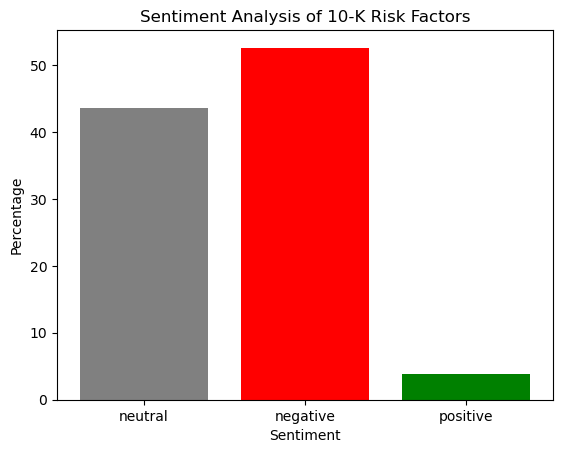

In [3]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'red', 'green'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Risk Factors")
    plt.show()

else:
    print("Section 1A not found.")

# FinBERT Airbnb 2024

In [ ]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972025000010/abnb-20241231.htm"


# Extract Section 1A Risk Factors"
section_text = extractorApi.get_section(filing_url, "1A", "text")
print(section_text)

 Item 1A. Risk Factors 

Our business, operations, and financial results are subject to various risks and uncertainties, including those described below, that could materially adversely affect our business, results of operations, financial condition, and the trading price of our Class A common stock. The following material factors, among others, could cause our actual results to differ materially from historical results and those expressed in forward-looking statements made by us or on our behalf in filings with the SEC, press releases, communications with investors, and oral statements. 

Risks Related to Our Business and Operations 

Revenue and Growth Risks 

We may not be able to sustain our revenue growth rate or effectively manage growth or new opportunities. 

Our future revenue growth depends on the growth of supply and demand for listings on our platform and the development and adoption of new offerings and initiatives. Our business is also affected by general economic and bus

Device set to use cpu


Sentiment Distribution: {'neutral': 43.52, 'negative': 52.57, 'positive': 3.91}


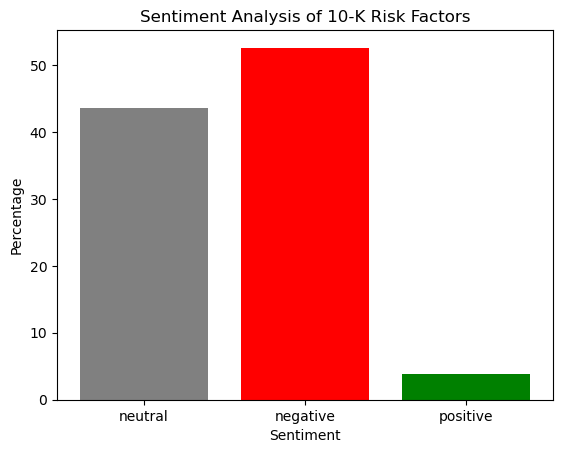

In [5]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'red', 'green'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Risk Factors")
    plt.show()

else:
    print("Section 1A not found.")

# FinBERT Airbnb 2023

In [ ]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972024000006/abnb-20231231.htm"


# Extract Section 1A "Risk Factors"
section_text = extractorApi.get_section(filing_url, "1A", "text")
print(section_text)

 Item 1A. Risk Factors 

Our business, operations, and financial results are subject to various risks and uncertainties, including those described below, that could materially adversely affect our business, results of operations, financial condition, and the trading price of our Class A common stock. The following material factors, among others, could cause our actual results to differ materially from historical results and those expressed in forward-looking statements made by us or on our behalf in filings with the SEC, press releases, communications with investors, and oral statements. 

Risks Related to Our Business 

Our revenue growth rate has slowed over time, and we expect it to continue to slow in the future. 

We have experienced significant revenue growth in the past; however, our revenue growth rate has slowed over time and there is no assurance that historic growth rates will return. Our future revenue growth depends on the growth of supply and demand for listings on our pl

Device set to use cpu


Sentiment Distribution: {'neutral': 50.07, 'negative': 45.07, 'positive': 4.86}


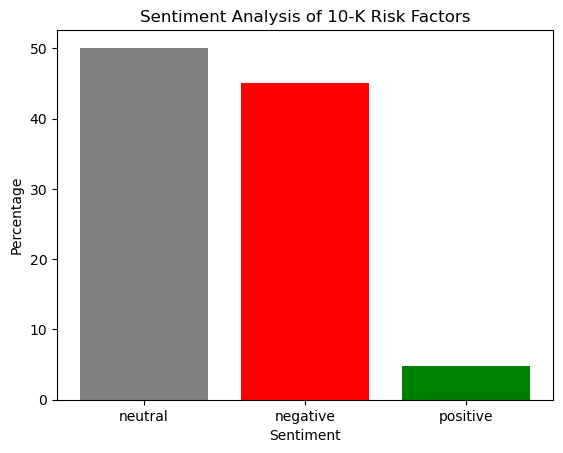

In [7]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'red', 'green'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Risk Factors")
    plt.show()

else:
    print("Section 1A not found.")

# FinBERT Airbnb 2022

In [ ]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972023000003/abnb-20221231.htm"


# Extract Section 1A "Risk Factors"
section_text = extractorApi.get_section(filing_url, "1A", "text")
print(section_text)

 Item 1A. Risk Factors 

Our business, operations, and financial results are subject to various risks and uncertainties, including those described below, that could materially adversely affect our business, results of operations, financial condition, and the trading price of our Class A common stock. The following material factors, among others, could cause our actual results to differ materially from historical results and those expressed in forward-looking statements made by us or on our behalf in filings with the SEC, press releases, communications with investors, and oral statements. 

Risks Related to Our Business 

Our revenue growth rate has slowed over time, and we expect it to continue to slow in the future. 

We have experienced significant revenue growth in the past; however, our revenue growth rate has slowed over time and there is no assurance that historic growth rates will return. Our future revenue growth depends on the growth of supply and demand for listings on our pl

Device set to use cpu


Sentiment Distribution: {'neutral': 47.77, 'negative': 47.36, 'positive': 4.87}


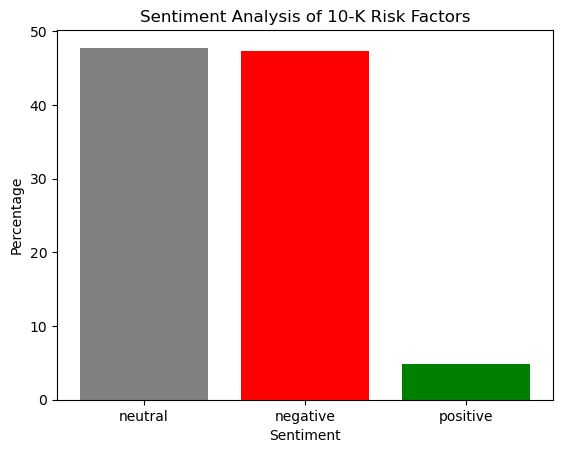

In [11]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'red', 'green'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Risk Factors")
    plt.show()

else:
    print("Section 1A not found.")

# FinBERT Airbnb 2021

In [ ]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("e6a91b9f25f7fe10fa59aeee447506d41825fb98675db8ad394177b1c66d6732")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972022000006/abnb-20211231.htm"


# Extract Section 1A "Risk Factors"
section_text = extractorApi.get_section(filing_url, "1A", "text")
print(section_text)

 Item 1A. Risk Factors 

Our business, operations, and financial results are subject to various risks and uncertainties, including those described below, that could materially adversely affect our business, results of operations, financial condition, and the trading price of our Class A common stock. The following material factors, among others, could cause our actual results to differ materially from historical results and those expressed in forward-looking statements made by us or on our behalf in filings with the SEC, press releases, communications with investors, and oral statements. 

Risks Related to Our Business 

The COVID-19 pandemic and the impact of actions to mitigate the COVID-19 pandemic have materially adversely impacted and may continue to materially adversely impact our business, results of operations, and financial condition. 

In March 2020, the World Health Organization declared the outbreak of COVID-19 a pandemic. Since then, the world has been and continues to be 

Device set to use cpu


Sentiment Distribution: {'neutral': 47.77, 'negative': 47.36, 'positive': 4.87}


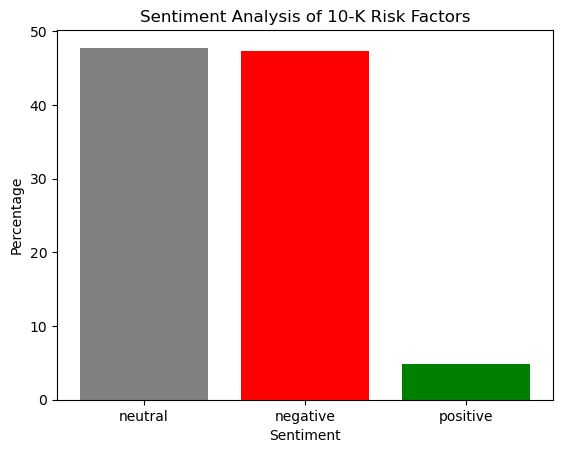

In [12]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'red', 'green'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Risk Factors")
    plt.show()

else:
    print("Section 1A not found.")

# FinBERT Airbnb 2020

In [ ]:
import requests
from sec_api import ExtractorApi
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Initialize sec-api with your API key
extractorApi = ExtractorApi("6a756bad45bcfb37a4a6e96fda374e3bb6ad45c1cf308782efadb2c52a45616d")  # Replace with your actual API key

# URL of the 10-K filing
filing_url = "https://www.sec.gov/Archives/edgar/data/1559720/000155972021000010/airbnb-10k.htm"


# Extract Section 1A "Risk Factors"
section_text = extractorApi.get_section(filing_url, "1A", "text")
print(section_text)

 Item 1A. Risk Factors 

Our business, operations and financial results are subject to various risks and uncertainties, including those described below, that could materially adversely affect our business, results of operations, financial condition, and the trading price of our Class A common stock. The following material factors, among others, could cause our actual results to differ materially from historical results and those expressed in forward-looking statements made by us or on our behalf in filings with the SEC, press releases, communications with investors, and oral statements. 

Risks Related to Our Business 

The COVID-19 pandemic and the impact of actions to mitigate the COVID-19 pandemic have materially adversely impacted and will continue to materially adversely impact our business, results of operations, and financial condition. 

In March 2020, the World Health Organization declared the outbreak of COVID-19 a pandemic. In an attempt to limit the spread of the virus, gov

Device set to use cpu


Sentiment Distribution: {'neutral': 47.57, 'negative': 47.96, 'positive': 4.47}


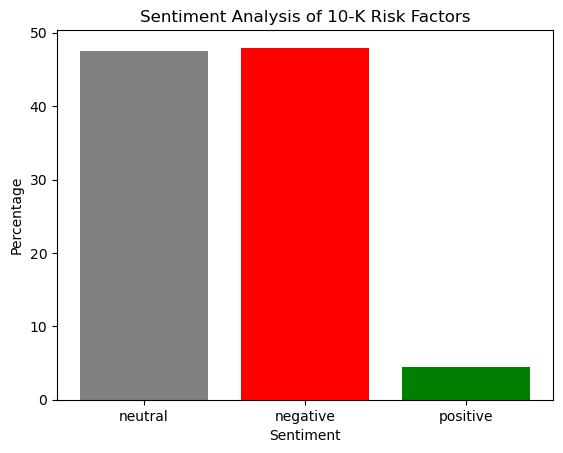

In [ ]:
if section_text:
    # Load FinBERT model
    finbert = pipeline("text-classification", model="ProsusAI/finbert")

    # Split text into chunks (FinBERT has a 512-token limit)
    sentences = section_text.split(". ")
    chunk = ""
    sentiment_results = []

    for sentence in sentences:
        if len(chunk) + len(sentence) < 512:
            chunk += sentence + ". "
        else:
            sentiment_results.extend(finbert(chunk[:512]))  # Process chunk
            chunk = sentence + ". "

    # Process the last chunk if any
    if chunk:
        sentiment_results.extend(finbert(chunk[:512]))

    # Aggregate Sentiments
    labels = [res['label'] for res in sentiment_results]
    count = Counter(labels)
    total = len(sentiment_results)
    percentage = {label: round((count[label] / total) * 100, 2) for label in count}

    # Print sentiment distribution
    print("Sentiment Distribution:", percentage)

    # Plot sentiment results
    plt.bar(percentage.keys(), percentage.values(), color=['gray', 'red', 'green'])
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.title("Sentiment Analysis of 10-K Risk Factors")
    plt.show()

else:
    print("Section 1A not found.")